In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(ggmap)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
system("wget https://emdb.jaea.go.jp/emdb/assets/site_data/ja/csv_utf8/1010202013/1010202013_07.csv.zip")
system("unzip 1010202013_07.csv.zip")
system("rm -rf 1010202013_07.csv.zip")

In [31]:
D <- data.frame(read.csv("1010202013_07.csv")) %>%
    mutate(lon=測定座標.メッシュ中心東経.10進法., lat=測定座標.メッシュ中心北緯.10進法., doserate=平均空間線量率.μSv.h. ) %>%
    select(lon, lat, doserate)
str(D)
D %>% summary()

'data.frame':	86255 obs. of  3 variables:
 $ lon     : num  140 140 140 140 140 ...
 $ lat     : num  37.2 37.2 37.2 37.2 37.3 ...
 $ doserate: num  0.069 0.059 0.054 0.056 0.07 0.049 0.047 0.067 0.052 0.043 ...


      lon             lat           doserate      
 Min.   :139.7   Min.   :36.80   Min.   : 0.0110  
 1st Qu.:140.4   1st Qu.:37.32   1st Qu.: 0.0710  
 Median :140.5   Median :37.46   Median : 0.0930  
 Mean   :140.5   Mean   :37.45   Mean   : 0.1839  
 3rd Qu.:140.7   3rd Qu.:37.66   3rd Qu.: 0.1400  
 Max.   :141.0   Max.   :37.95   Max.   :18.0000  

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=37.454036,140.507754&zoom=9&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false


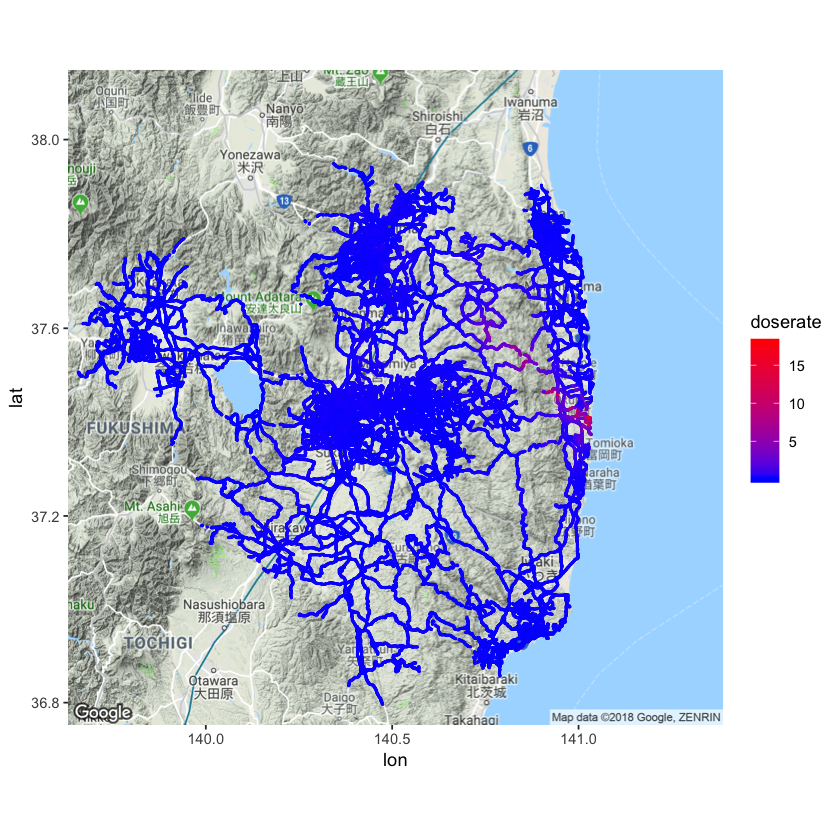

In [59]:
map <- get_map(c(mean(D$lon), mean(D$lat)), zoom=9)
ggmap(map) + 
    geom_point(data=D, aes(x=lon, y=lat, colour=doserate), size=0.2) +
    scale_colour_gradient(low = "blue", high = "red")